In [3]:
# LDA 토픽모델링:

from konlpy.tag import Okt
# !pip install gensim
from gensim.corpora import Dictionary
from gensim.models import LdaModel

documents = [
    "국토교통부는 부동산 투기 근절을 위해 강력한 세금 정책을 예고했습니다. 다주택자에 대한 규제가 핵심입니다.",
    "정부의 새로운 공급 대책 발표 이후, 부동산 시장의 반응은 엇갈리고 있습니다. 전문가들은 정책의 실효성에 주목합니다.",
    "치솟는 집값 안정을 위해 정부는 대출 총량 규제를 더욱 강화할 방침입니다. 서민들의 내 집 마련이 어려워지고 있습니다.",
    "이번 부동산 정책은 신혼부부와 청년층을 위한 특별 공급 물량 확대에 초점을 맞추고 있습니다.",
    "부동산 시장의 과열을 막기 위해 금리 인상과 같은 금융 정책이 함께 동원되어야 한다는 목소리가 높습니다.",
    "최근 반려동물을 가족처럼 여기는 사람들이 늘어나면서 펫팸족이라는 신조어가 생겼습니다. 동물에 대한 사랑이 깊어지고 있습니다.",
    "유기견 보호소에서는 매일 새로운 강아지들이 구조되고 있습니다. 많은 유기견들이 새로운 가족을 기다리며 입양을 희망합니다.",
    "강아지 입양 전에는 신중한 고민이 필요합니다. 한 생명을 책임지는 일이기에 사랑과 헌신이 중요합니다.",
    "동물보호단체는 유기동물 안락사를 줄이기 위해 사회적인 관심과 적극적인 입양 캠페인이 필요하다고 강조했습니다.",
    "길고양이들을 위한 겨울나기 쉼터가 마련되었습니다. 시민들의 따뜻한 사랑 덕분에 동물들이 추운 겨울을 보낼 수 있게 됐습니다."
]

In [4]:
okt = Okt()
tokenized_docs = [okt.nouns(i) for i in documents]        # 각각의 문장 내에서 토큰화 
tokenized_docs

[['국토교통부', '부동산', '투기', '근절', '위해', '세금', '정책', '예고', '주택', '대한', '규제', '핵심'],
 ['정부', '공급', '대책', '발표', '이후', '부동산', '시장', '반응', '전문가', '정책', '실효', '주목'],
 ['집값', '안정', '위해', '정부', '대출', '총량', '규제', '더욱', '방침', '서민', '내', '집', '마련'],
 ['이번', '부동산', '정책', '신혼부부', '청년', '층', '위', '특별', '공급', '물량', '확대', '초점'],
 ['부동산', '시장', '과열', '위해', '금리', '인상', '금융', '정책', '동원', '목소리'],
 ['최근', '반려동물', '가족', '사람', '펫팸족', '신조어', '동물', '대한', '사랑'],
 ['유기견', '보호', '소', '매일', '강아지', '구조', '유기견', '가족', '입양', '희망'],
 ['강아지', '입양', '전', '고민', '생명', '이기', '사랑', '헌신'],
 ['동물보호', '단체', '유기동물', '안락사', '위해', '사회', '관심', '적극', '입양', '캠페인', '강조'],
 ['길고양이', '위', '겨울나기', '터', '마련', '시민', '사랑', '덕분', '동물', '겨울', '수']]

In [8]:
dictionary = Dictionary(tokenized_docs)
list(dictionary.items())     # 라벨링한 단어들

[(0, '국토교통부'),
 (1, '규제'),
 (2, '근절'),
 (3, '대한'),
 (4, '부동산'),
 (5, '세금'),
 (6, '예고'),
 (7, '위해'),
 (8, '정책'),
 (9, '주택'),
 (10, '투기'),
 (11, '핵심'),
 (12, '공급'),
 (13, '대책'),
 (14, '반응'),
 (15, '발표'),
 (16, '시장'),
 (17, '실효'),
 (18, '이후'),
 (19, '전문가'),
 (20, '정부'),
 (21, '주목'),
 (22, '내'),
 (23, '대출'),
 (24, '더욱'),
 (25, '마련'),
 (26, '방침'),
 (27, '서민'),
 (28, '안정'),
 (29, '집'),
 (30, '집값'),
 (31, '총량'),
 (32, '물량'),
 (33, '신혼부부'),
 (34, '위'),
 (35, '이번'),
 (36, '청년'),
 (37, '초점'),
 (38, '층'),
 (39, '특별'),
 (40, '확대'),
 (41, '과열'),
 (42, '금리'),
 (43, '금융'),
 (44, '동원'),
 (45, '목소리'),
 (46, '인상'),
 (47, '가족'),
 (48, '동물'),
 (49, '반려동물'),
 (50, '사람'),
 (51, '사랑'),
 (52, '신조어'),
 (53, '최근'),
 (54, '펫팸족'),
 (55, '강아지'),
 (56, '구조'),
 (57, '매일'),
 (58, '보호'),
 (59, '소'),
 (60, '유기견'),
 (61, '입양'),
 (62, '희망'),
 (63, '고민'),
 (64, '생명'),
 (65, '이기'),
 (66, '전'),
 (67, '헌신'),
 (68, '강조'),
 (69, '관심'),
 (70, '단체'),
 (71, '동물보호'),
 (72, '사회'),
 (73, '안락사'),
 (74, '유기동물'),
 (75, '적극'),
 (76, '캠페

In [10]:
# 각 문서마다 해당 단어가 몇번 나왔는지
# 각 문서별 [단어 ID, 단어빈도] 형태.

corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]
corpus

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1)],
 [(4, 1),
  (8, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1)],
 [(1, 1),
  (7, 1),
  (20, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1)],
 [(4, 1),
  (8, 1),
  (12, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1)],
 [(4, 1),
  (7, 1),
  (8, 1),
  (16, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1)],
 [(3, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1)],
 [(47, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 2),
  (61, 1),
  (62, 1)],
 [(51, 1), (55, 1), (61, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1)],
 [(7, 1),
  (61, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (7

In [13]:
from gensim.models import CoherenceModel

values = []

for n in range(2, 11):
    model = LdaModel(corpus=corpus, id2word=dictionary,
                     num_topics=n, passes=100)       # corpus와 dictionary로 학습한 LDA모델. 평균적으로 100번 학습 

    co = CoherenceModel(model=model, texts=tokenized_docs,
                        dictionary=dictionary)
    values.append(co.get_coherence())
    print(f"토픽수 : {n}, Values : {co.get_coherence()}")

토픽수 : 2, Values : 0.3555376383295846
토픽수 : 3, Values : 0.29988481068704925
토픽수 : 4, Values : 0.21175958883501284
토픽수 : 5, Values : 0.287468683346741
토픽수 : 6, Values : 0.37300396048254947
토픽수 : 7, Values : 0.3972116184678166
토픽수 : 8, Values : 0.3989612340916461
토픽수 : 9, Values : 0.337472795638718
토픽수 : 10, Values : 0.3182337567394131


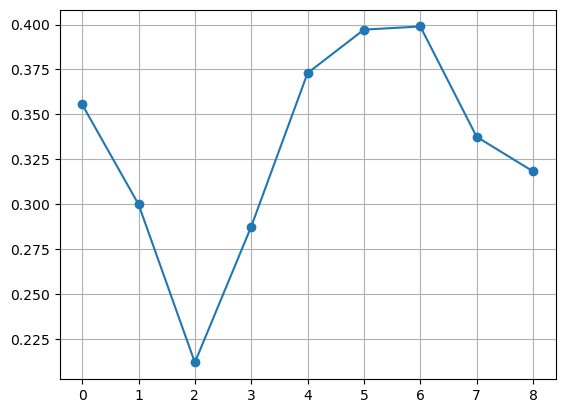

In [14]:
import matplotlib.pyplot as plt
plt.plot(values, marker = "o")
plt.grid()
plt.show()

In [22]:
# 0: 동물관련 토픽
# 1: 부동산 정책 및 규제

model = LdaModel(corpus, num_topics=2, id2word=dictionary, passes=100)      # 토픽은 더이상 줄이기 애매할때까지 줄일 것
topics = model.print_topics(num_words=5)
topics

[(0, '0.037*"입양" + 0.027*"사랑" + 0.027*"유기견" + 0.027*"강아지" + 0.027*"위"'),
 (1, '0.036*"부동산" + 0.036*"정책" + 0.036*"위해" + 0.025*"규제" + 0.025*"정부"')]

In [32]:
import numpy as np

def make_topic(x):
    check = []
    for i in x:
        check.append(i[1])
    return np.argmax(check)

box = []
for i, doc_bow in enumerate(corpus):
    doc_topic = model.get_document_topics(doc_bow)
    print(f"{i}번째 문서 토픽 : {doc_topic} - {make_topic(doc_topic)}")
    box.append(make_topic(doc_topic))
# 0번째 문서는  4% 확률로 1번 토픽, 95% 확률로 2번 토픽 

0번째 문서 토픽 : [(0, 0.040699385), (1, 0.9593006)] - 1
1번째 문서 토픽 : [(0, 0.041546285), (1, 0.9584537)] - 1
2번째 문서 토픽 : [(0, 0.03827419), (1, 0.96172583)] - 1
3번째 문서 토픽 : [(0, 0.94772494), (1, 0.052275073)] - 0
4번째 문서 토픽 : [(0, 0.048343953), (1, 0.95165604)] - 1
5번째 문서 토픽 : [(0, 0.063341804), (1, 0.9366582)] - 1
6번째 문서 토픽 : [(0, 0.95186114), (1, 0.048138846)] - 0
7번째 문서 토픽 : [(0, 0.9417439), (1, 0.058256134)] - 0
8번째 문서 토픽 : [(0, 0.9525053), (1, 0.047494695)] - 0
9번째 문서 토픽 : [(0, 0.9538014), (1, 0.046198625)] - 0


In [33]:
box

[1, 1, 1, 0, 1, 1, 0, 0, 0, 0]

In [34]:
import pandas as pd
result = pd.DataFrame(documents, columns = ["내용"])
result["토픽"] = box
result

,내용,토픽
0,국토교통부는 부동산 투기 근절을 위해 강력한 세금 정책을 예고했습니다. 다주택자에 ...,1
1,"정부의 새로운 공급 대책 발표 이후, 부동산 시장의 반응은 엇갈리고 있습니다. 전문...",1
2,치솟는 집값 안정을 위해 정부는 대출 총량 규제를 더욱 강화할 방침입니다. 서민들의...,1
3,이번 부동산 정책은 신혼부부와 청년층을 위한 특별 공급 물량 확대에 초점을 맞추고 ...,0
4,부동산 시장의 과열을 막기 위해 금리 인상과 같은 금융 정책이 함께 동원되어야 한다...,1
5,최근 반려동물을 가족처럼 여기는 사람들이 늘어나면서 펫팸족이라는 신조어가 생겼습니다...,1
6,유기견 보호소에서는 매일 새로운 강아지들이 구조되고 있습니다. 많은 유기견들이 새로...,0
7,강아지 입양 전에는 신중한 고민이 필요합니다. 한 생명을 책임지는 일이기에 사랑과 ...,0
8,동물보호단체는 유기동물 안락사를 줄이기 위해 사회적인 관심과 적극적인 입양 캠페인이...,0
9,길고양이들을 위한 겨울나기 쉼터가 마련되었습니다. 시민들의 따뜻한 사랑 덕분에 동물...,0


In [35]:
# !pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim_models

A = pyLDAvis.gensim_models.prepare(model, corpus, dictionary)
pyLDAvis.display(A)